In [ ]:
write the problem stmt detailedly 
see his 2hr comprehensive EDA video !! then try to understand this video !!

In [1]:
#installing required libraries
#!pip3 install matplotlib
#!pip3 install seaborn

In [1]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
base_data = pd.read_csv('Data.csv')
base_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [3]:
#inference: no null data, ScheduledDay & AppointmentDay data types need to be changed
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#modifying the date and time into standard form
base_data['ScheduledDay'] = pd.to_datetime(base_data['ScheduledDay']).dt.date.astype('datetime64[ns]')
base_data['AppointmentDay'] = pd.to_datetime(base_data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [5]:
# colums truncated and data type changed
base_data.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
20802,2.855157e+14,5712662,M,2016-05-18,2016-05-24,31,MARUÍPE,0,0,0,0,0,1,No
95067,9.281948e+13,5706142,M,2016-05-17,2016-06-01,32,ROMÃO,0,0,0,0,0,1,No
58906,7.411218e+13,5745763,M,2016-05-30,2016-05-31,63,BOA VISTA,0,1,0,0,0,0,No
73036,1.969746e+11,5741464,M,2016-05-30,2016-05-31,58,GRANDE VITÓRIA,0,0,0,0,0,0,No
33994,6.296765e+13,5644636,M,2016-05-02,2016-05-17,38,GURIGICA,0,0,0,0,0,0,No


In [6]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

Creating a "week day" column for ScheduledDay & AppointmentDay separately 

In [7]:
# 0 is Monday, 5 is Saturday, 6 is Sunday 

base_data['sch_weekday'] = base_data['ScheduledDay'].dt.dayofweek
base_data['app_weekday'] = base_data['AppointmentDay'].dt.dayofweek

In [8]:
base_data['sch_weekday'].value_counts()


sch_weekday
1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: count, dtype: int64

In [9]:
base_data['app_weekday'].value_counts()

app_weekday
2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: count, dtype: int64

In [10]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [11]:
#changing the name of some cloumns
base_data= base_data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [28]:
# dropping some columns which have no significance (no point doing statistics on Primary keys)
base_data.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
base_data.drop(['Neighbourhood'], axis=1, inplace=True)

KeyError: "['Neighbourhood'] not found in axis"

In [13]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Scholarship     110527 non-null  int64         
 7   Hypertension    110527 non-null  int64         
 8   Diabetes        110527 non-null  int64         
 9   Alcoholism      110527 non-null  int64         
 10  Handicap        110527 non-null  int64         
 11  SMSReceived     110527 non-null  int64         
 12  NoShow          110527 non-null  object        
 13  sch_weekday     110527 non-null  int32         
 14  app_weekday     110527 non-null  int

In [14]:
base_data.describe()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,sch_weekday,app_weekday
count,1.105270e+05,1.105270e+05,110527,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,2016-05-08 20:33:18.179630080,2016-05-19 00:57:50.008233472,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
min,3.921784e+04,5.030230e+06,2015-11-10 00:00:00,2016-04-29 00:00:00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,2016-04-29 00:00:00,2016-05-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.173184e+13,5.680573e+06,2016-05-10 00:00:00,2016-05-18 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,9.439172e+13,5.725524e+06,2016-05-20 00:00:00,2016-05-31 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,9.999816e+14,5.790484e+06,2016-06-08 00:00:00,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000
std,2.560949e+14,7.129575e+04,NaN,NaN,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672


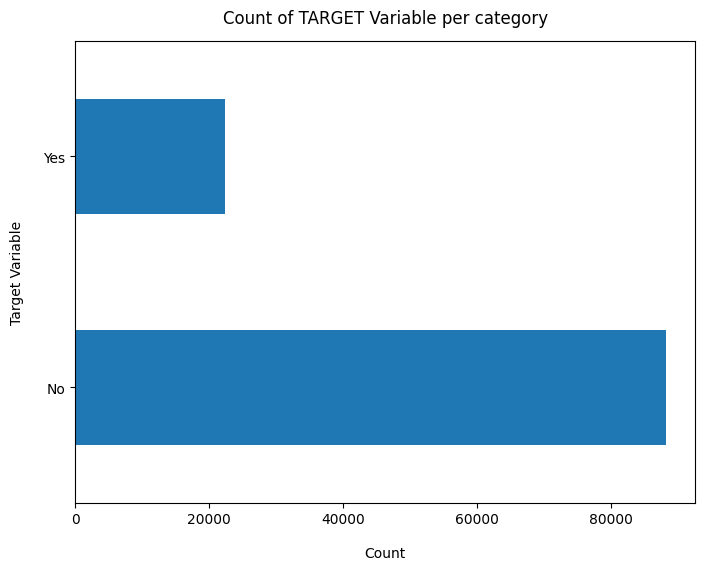

In [15]:
base_data['NoShow'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [16]:
# Calculating the % of encounters happened or didn't happen
(base_data['NoShow'].value_counts()/len(base_data['NoShow']))*100

NoShow
No     79.806744
Yes    20.193256
Name: count, dtype: float64

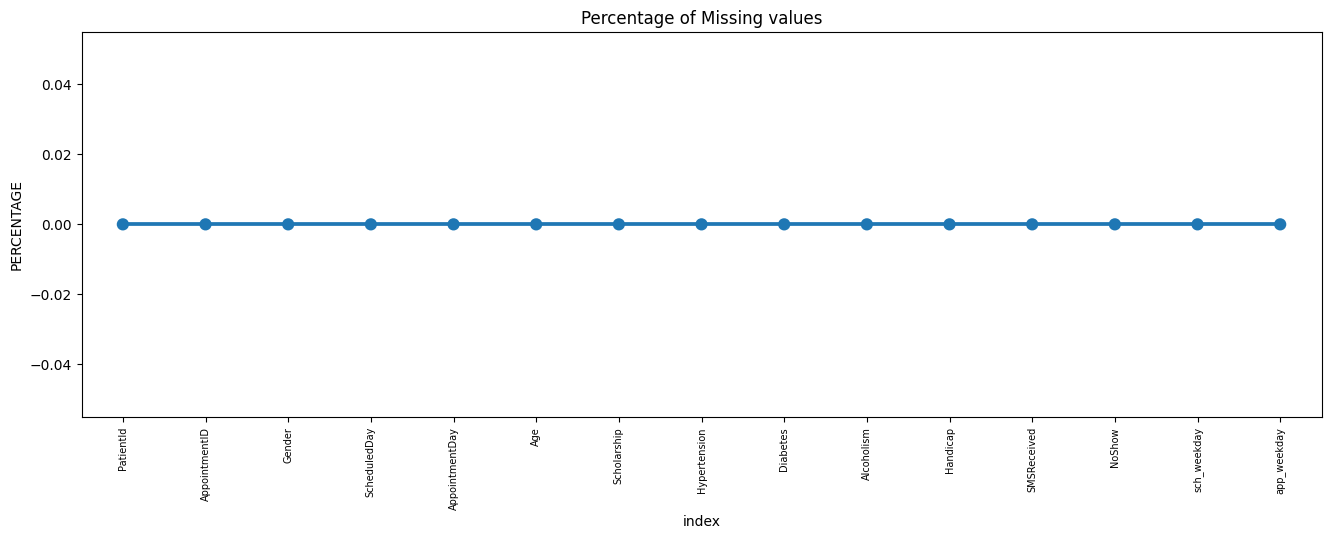

In [17]:
#finding percentage of missing values
missing = pd.DataFrame((base_data.isnull().sum())*100/base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data = missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

## Missing Data - Initial Intuition
Here, we don't have any missing data.
### General Rule of Thumb:
1. For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
2. For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
3. As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values.

# Data Cleaning:

Note: Since we don't have null values, the job is half done
1. Create a copy of base data for manupulation & processing

In [18]:
new_data = base_data.copy()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Scholarship     110527 non-null  int64         
 7   Hypertension    110527 non-null  int64         
 8   Diabetes        110527 non-null  int64         
 9   Alcoholism      110527 non-null  int64         
 10  Handicap        110527 non-null  int64         
 11  SMSReceived     110527 non-null  int64         
 12  NoShow          110527 non-null  object        
 13  sch_weekday     110527 non-null  int32         
 14  app_weekday     110527 non-null  int

In [19]:
# Get the max tenure
print(base_data['Age'].max()) #72

115


In [20]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

base_data['Age_group'] = pd.cut(base_data.Age, range(1, 130, 20), right=False, labels=labels)
base_data.drop(['Age'], axis=1, inplace=True)

# Data Exploration:

In [21]:
list(base_data.columns)


['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'sch_weekday',
 'app_weekday',
 'Age_group']

---------- PatientId ----------
PatientId
8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
                ..
8.622636e+11     1
9.267587e+12     1
5.764356e+12     1
5.712491e+12     1
1.557663e+13     1
Name: count, Length: 62299, dtype: int64
---------- AppointmentID ----------
AppointmentID
5642903    1
5692618    1
5687640    1
5740664    1
5740598    1
          ..
5718442    1
5426425    1
5424230    1
5720832    1
5629448    1
Name: count, Length: 110527, dtype: int64
---------- Gender ----------
Gender
F    71840
M    38687
Name: count, dtype: int64
---------- ScheduledDay ----------
ScheduledDay
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: count, Length: 111, dtype: int64
---------- AppointmentDay ----------
AppointmentDay
2016-06-06    4692
2016-05-16    4613
201

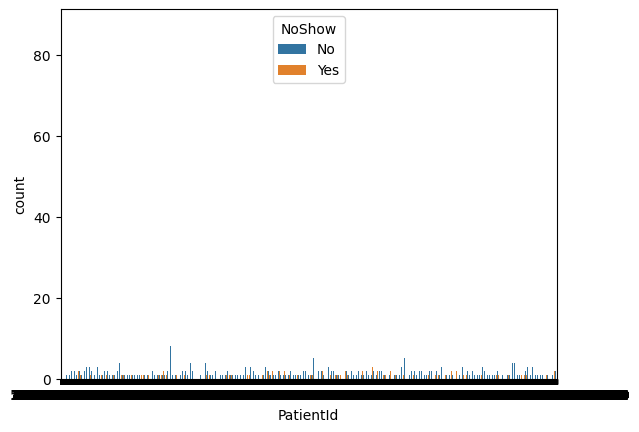

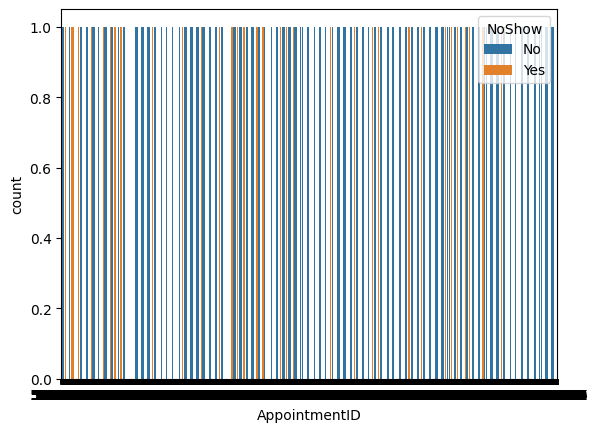

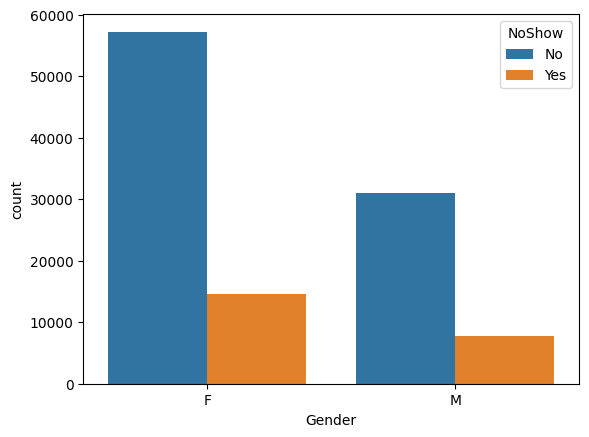

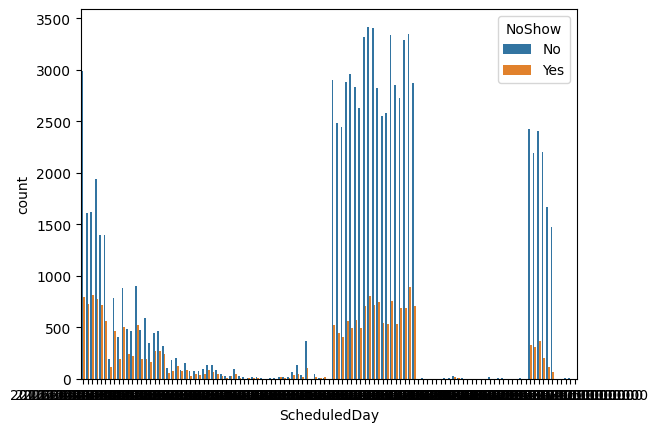

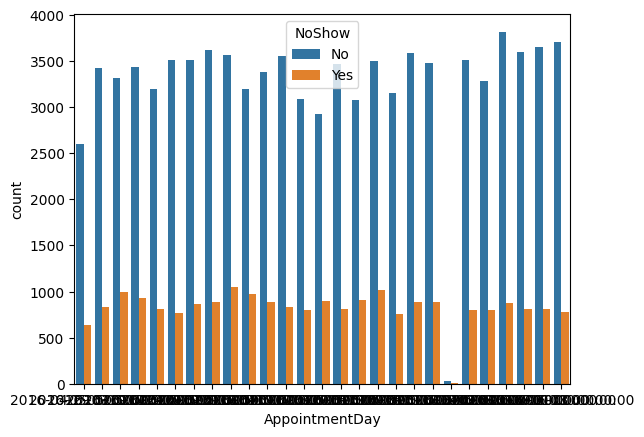

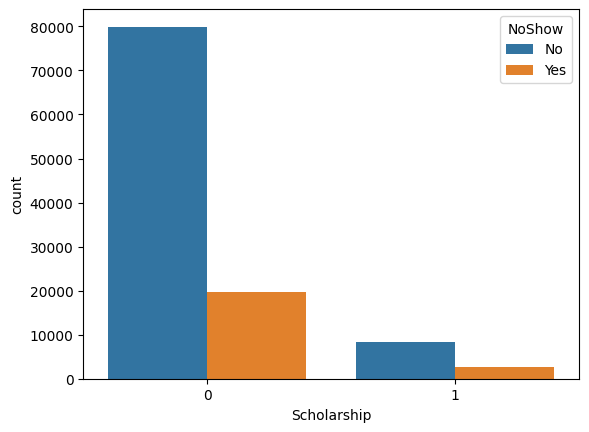

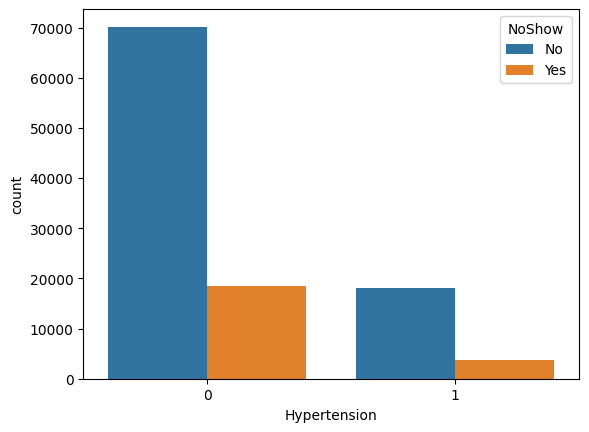

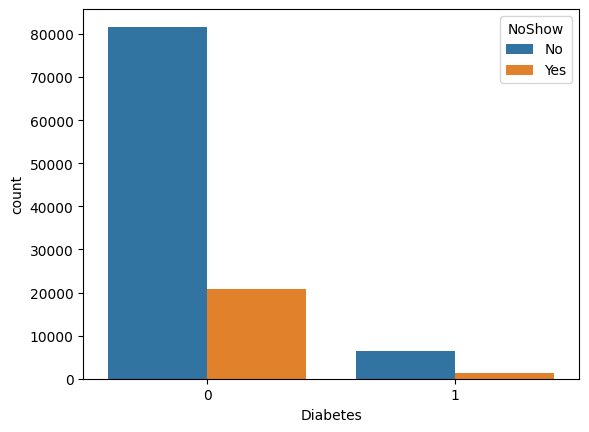

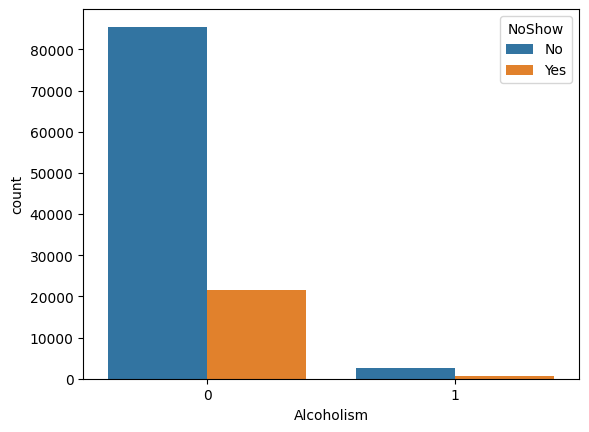

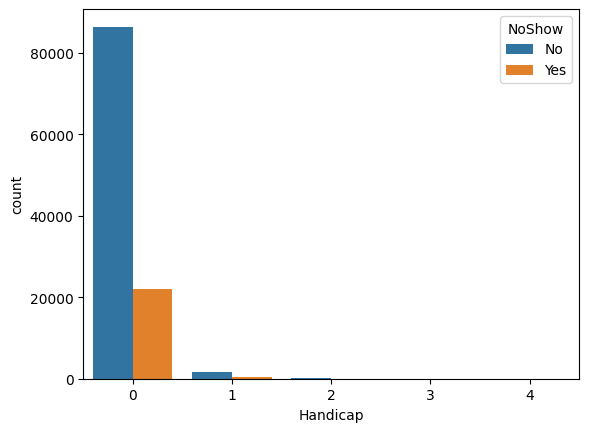

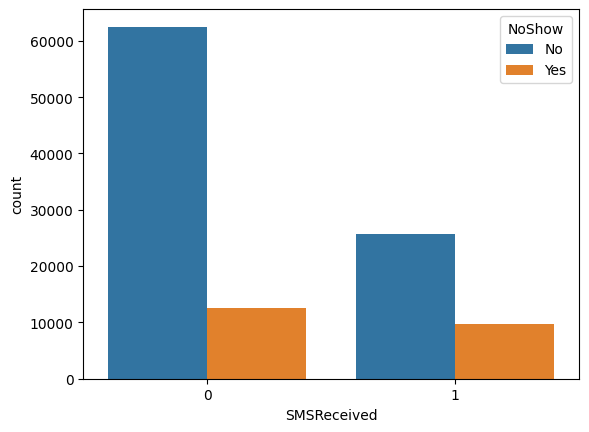

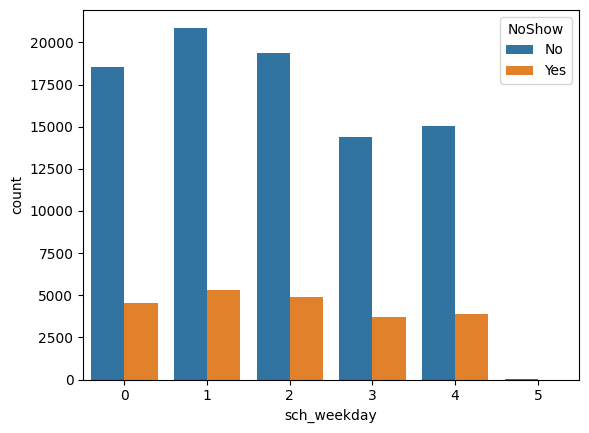

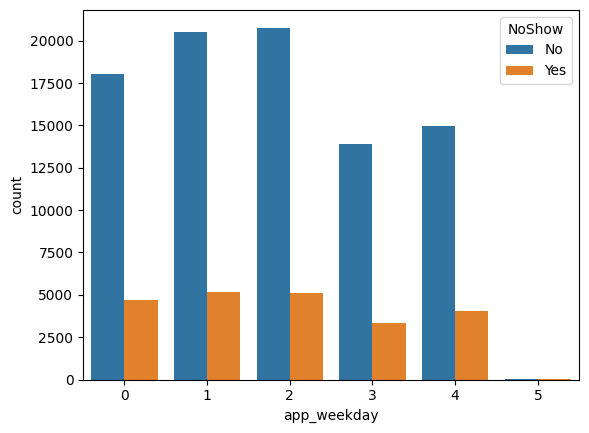

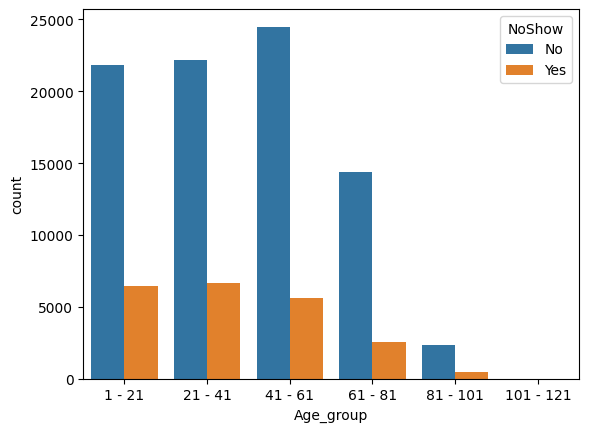

In [22]:
#having a look into the values of count of each columns and count in respect to NoShow column
for i, predictor in enumerate(base_data.drop(columns=['NoShow'])):
    print('-'*10,predictor,'-'*10)
    print(base_data[predictor].value_counts())    
    plt.figure(i)
    sns.countplot(data=base_data, x=predictor, hue='NoShow')

In [23]:
base_data['NoShow'] = np.where(base_data.NoShow == 'Yes',1,0)

In [24]:
base_data.NoShow.value_counts()

NoShow
0    88208
1    22319
Name: count, dtype: int64

Convert all the categorical variables into dummy variables

In [25]:
base_data_dummies = pd.get_dummies(base_data)
base_data_dummies.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,...,sch_weekday,app_weekday,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2.987250e+13,5642903,2016-04-29,2016-04-29,0,1,0,0,0,0,...,4,4,True,False,False,False,False,True,False,False
1,5.589978e+14,5642503,2016-04-29,2016-04-29,0,0,0,0,0,0,...,4,4,False,True,False,False,True,False,False,False
2,4.262962e+12,5642549,2016-04-29,2016-04-29,0,0,0,0,0,0,...,4,4,True,False,False,False,False,True,False,False
3,8.679512e+11,5642828,2016-04-29,2016-04-29,0,0,0,0,0,0,...,4,4,True,False,True,False,False,False,False,False
4,8.841186e+12,5642494,2016-04-29,2016-04-29,0,1,1,0,0,0,...,4,4,True,False,False,False,True,False,False,False


In [26]:
base_data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   PatientId            110527 non-null  float64       
 1   AppointmentID        110527 non-null  int64         
 2   ScheduledDay         110527 non-null  datetime64[ns]
 3   AppointmentDay       110527 non-null  datetime64[ns]
 4   Scholarship          110527 non-null  int64         
 5   Hypertension         110527 non-null  int64         
 6   Diabetes             110527 non-null  int64         
 7   Alcoholism           110527 non-null  int64         
 8   Handicap             110527 non-null  int64         
 9   SMSReceived          110527 non-null  int64         
 10  NoShow               110527 non-null  int64         
 11  sch_weekday          110527 non-null  int32         
 12  app_weekday          110527 non-null  int32         
 13  Gender_F      

Build a corelation of all predictors with 'NoShow'

<Axes: >

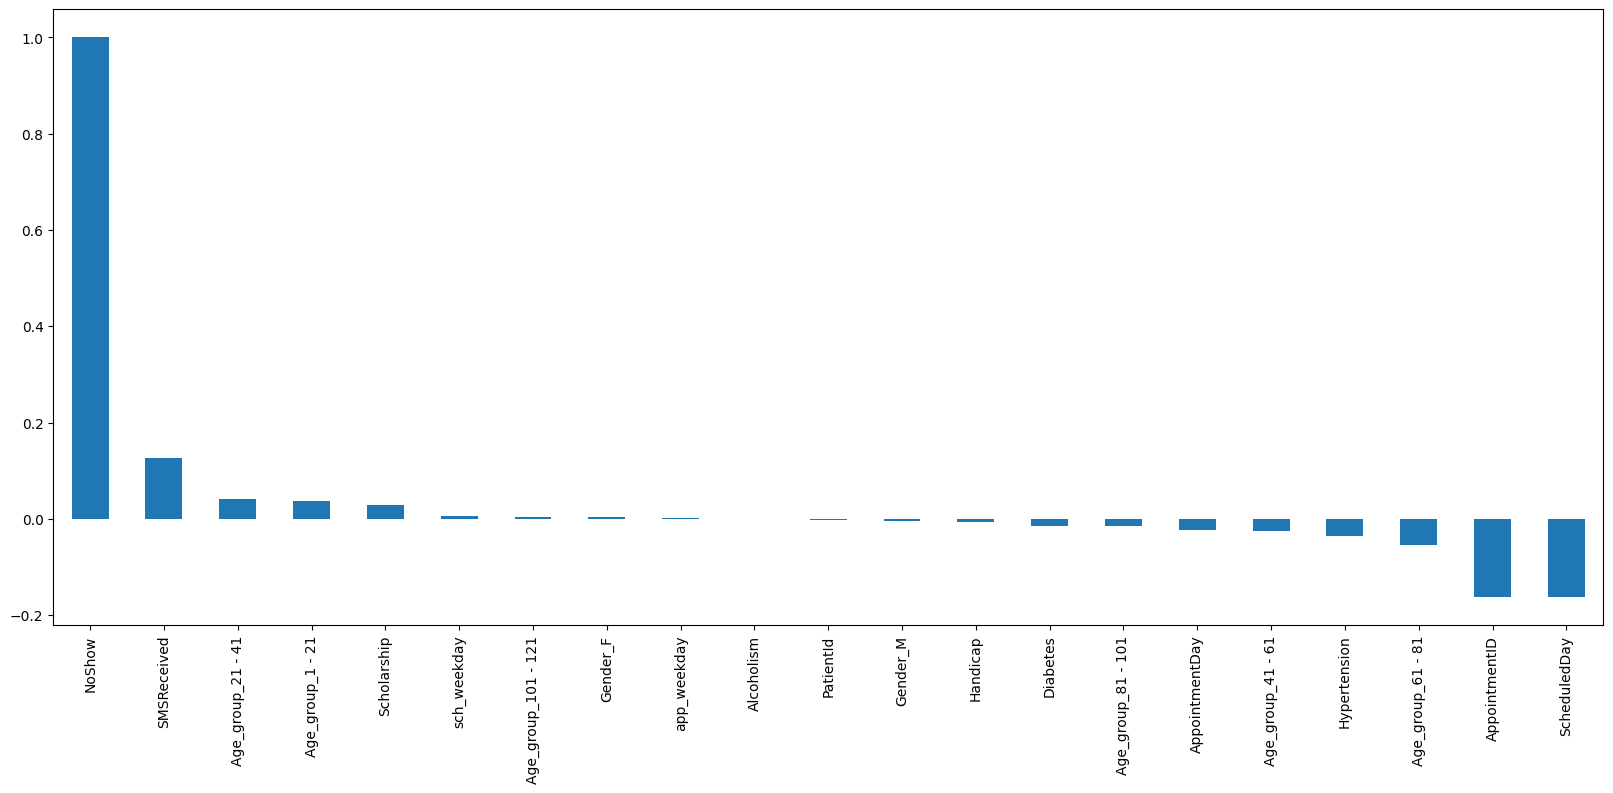

In [27]:
plt.figure(figsize=(20,8))
base_data_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

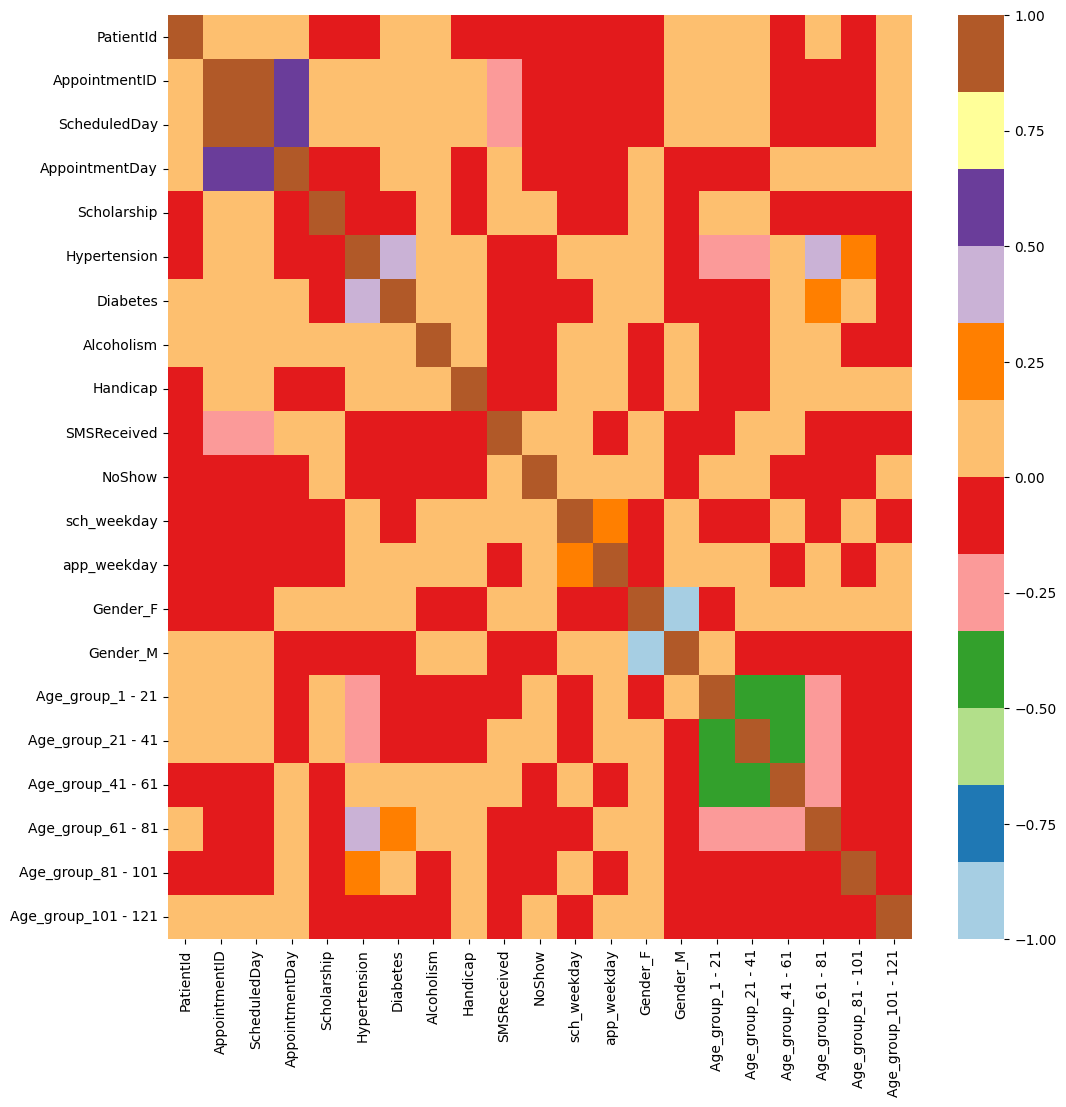

In [29]:
plt.figure(figsize=(12,12))
sns.heatmap(base_data_dummies.corr(), cmap="Paired")

# Bivariate Analysis

In [30]:
new_df1_target0=base_data.loc[base_data["NoShow"]==0]
new_df1_target1=base_data.loc[base_data["NoShow"]==1]

In [31]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()


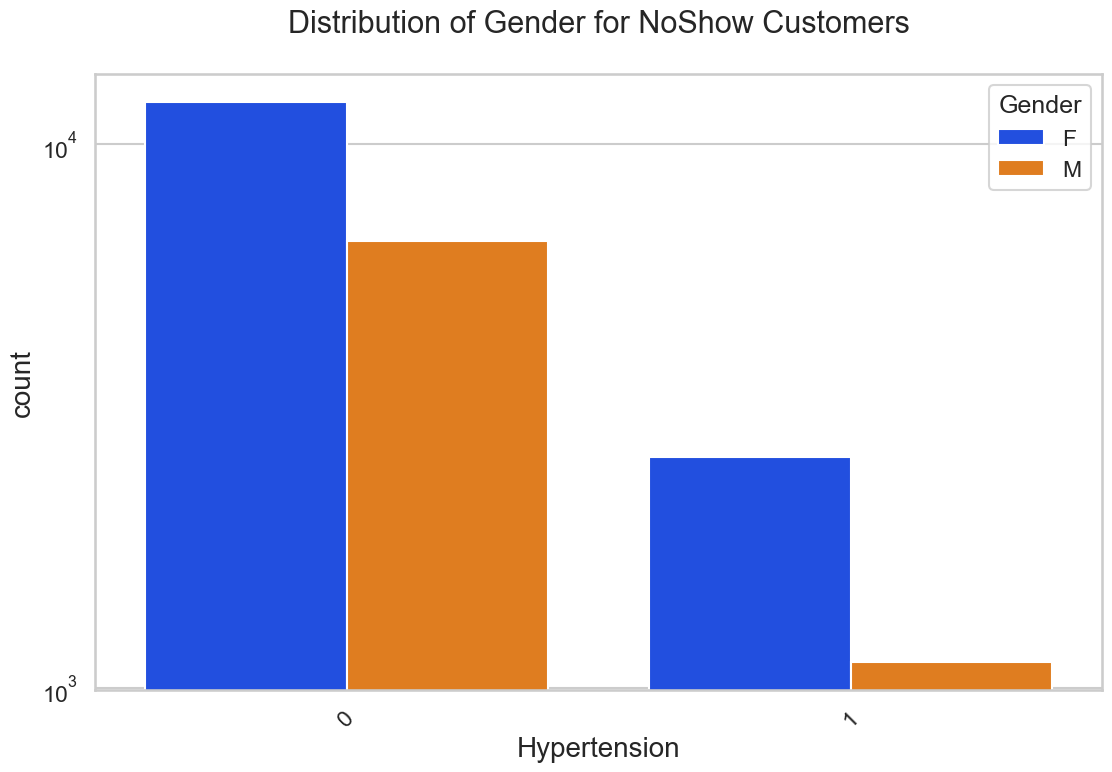

In [32]:
uniplot(new_df1_target1,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

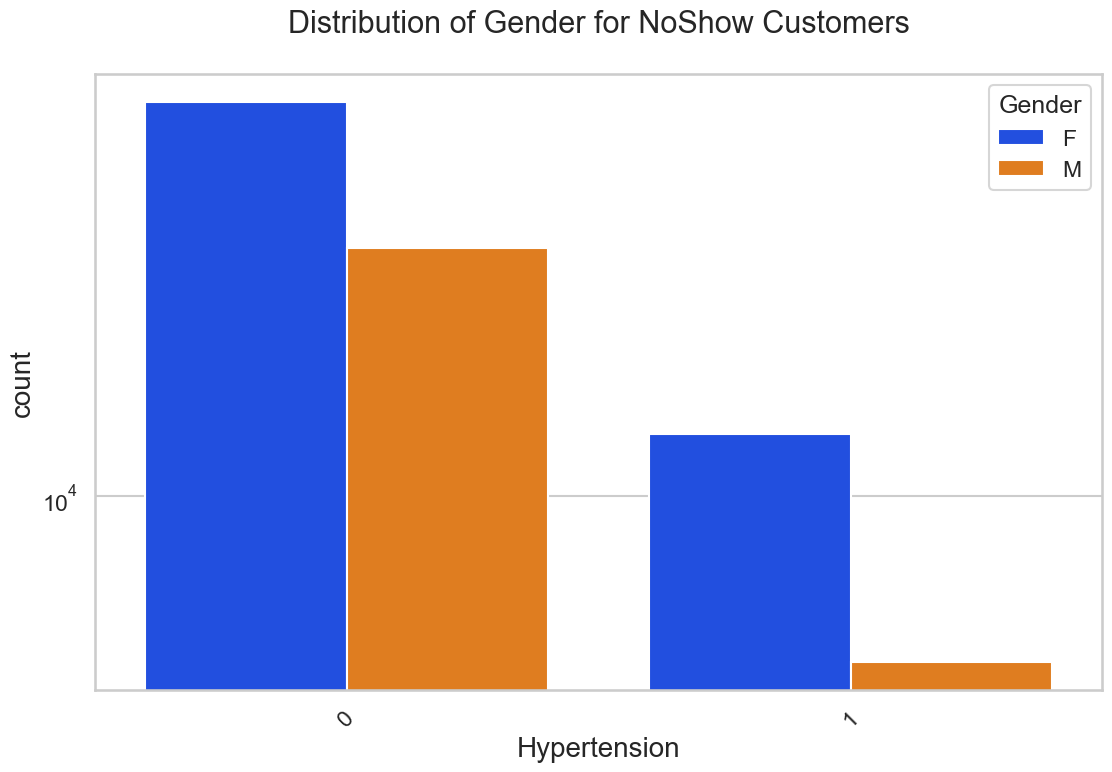

In [33]:
uniplot(new_df1_target0,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

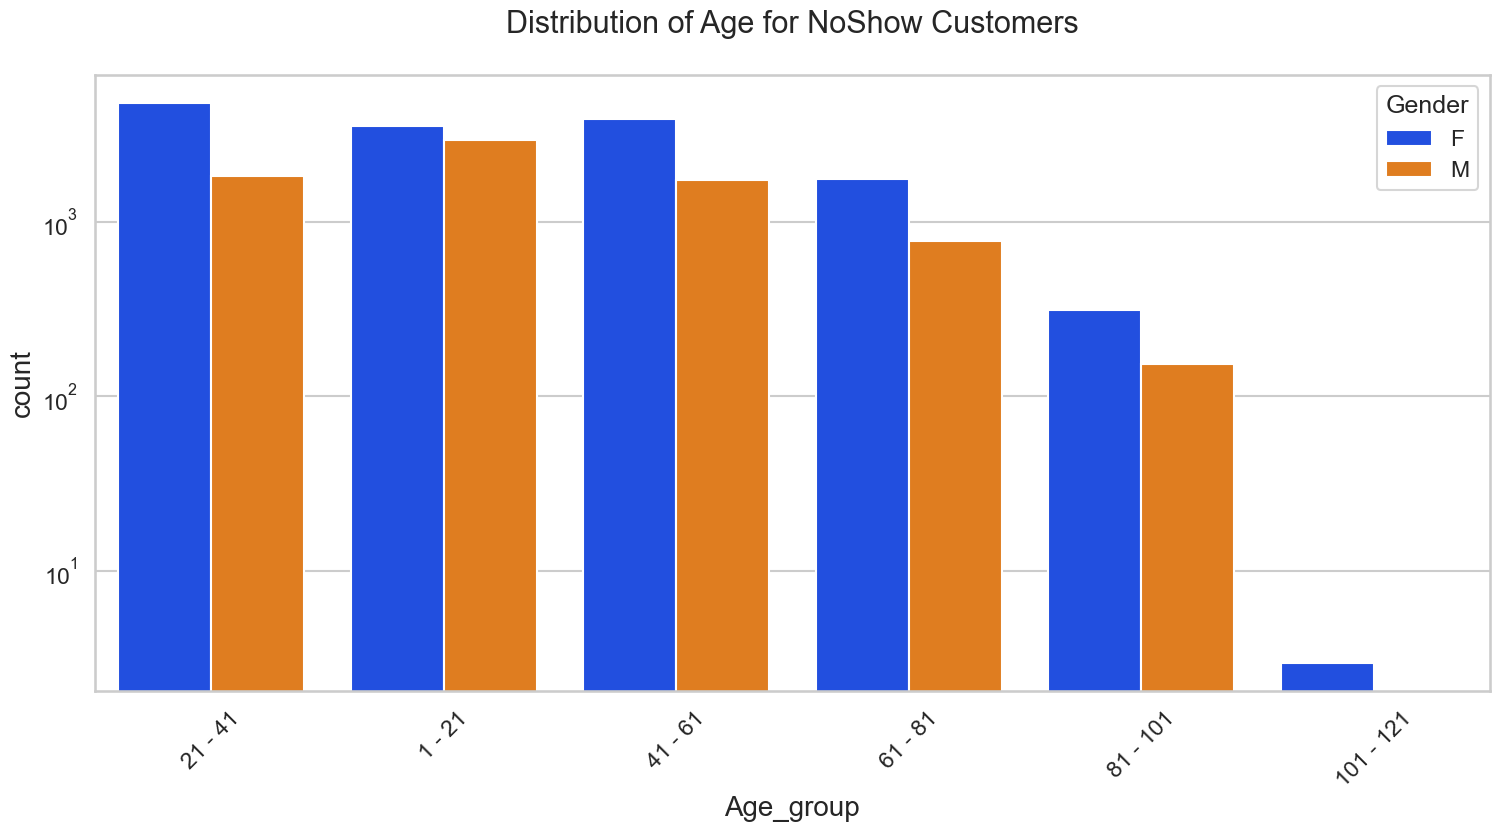

In [34]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

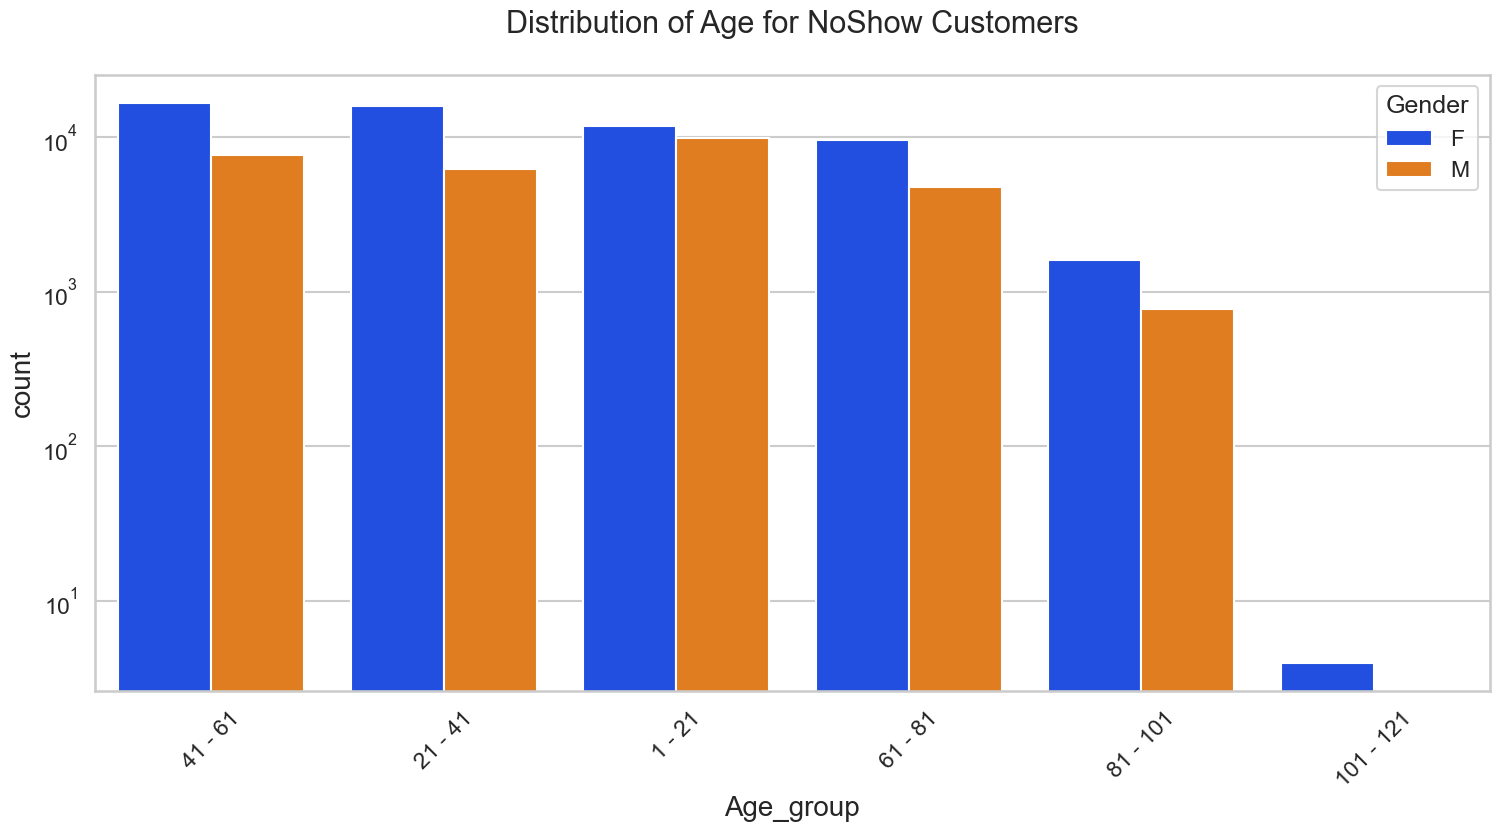

In [35]:
uniplot(new_df1_target0,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

# FINDINGS:

1. Female patients have taken more appointments then male patients
2. Ratio of Nohow and Show is almost equal for age group except Age 0 and Age 1 with 80% show rate for each age group
3. Each Neighbourhood have almost 80% show rate
4. There are 99666 patients without Scholarship and out of them around 80% have come for the visit and out of the 21801 patients with Scholarship around 75% of them have come for the visit.
5. There are around 88,726 patients without Hypertension and out of them around 78% have come for the visit and Out of the 21801 patients with Hypertension around 85% of them have come for the visit.
6. There are around 102,584 patients without Diabetes and out of them around 80% have come for the visit and Out of the 7,943 patients with Diabetes around 83% of them have come for the visit.
7. There are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received SMS around 72% of them have come for the visit.
8. There is no appointments on sunday and on saturday appointments are very less in comparision to other week days